In [ ]:
import json
import pandas as pd
from pathlib import Path

import json
import pandas as pd
from pathlib import Path

def stream_jsonl_to_parquet(jsonl_path, output_folder, batch_size=10000):
    buffer = []
    batch_num = 0

    output_folder = Path(output_folder)
    output_folder.mkdir(parents=True, exist_ok=True)

    print(f"Processing {jsonl_path}...")

    with open(jsonl_path, "r") as f:
        for i, line in enumerate(f):
            try:
                obj = json.loads(line)
                if obj.get("label") in [0, 1]:
                    buffer.append(obj)

                if len(buffer) >= batch_size:
                    df = pd.DataFrame(buffer)
                    output_path = output_folder / f"batch_{batch_num}.parquet"
                    df.to_parquet(output_path, index=False, engine="pyarrow", compression='snappy')
                    print(f"  Saved batch {batch_num} with {len(df)} rows to {output_path}")
                    buffer.clear()
                    batch_num += 1

                    break

            except json.JSONDecodeError as e:
                print(f"  Skipping line {i} due to JSON error: {e}")

    # Save any leftover rows
    if buffer:
        df = pd.DataFrame(buffer)
        output_path = output_folder / f"batch_{batch_num}.parquet"
        df.to_parquet(output_path, index=False, engine="pyarrow", compression='snappy')
        print(f"  Saved final batch {batch_num} with {len(df)} rows to {output_path}")

    print(f"Finished processing {jsonl_path}")


# Open and process the JSONL file
input_file = "F://ember//train_features_1.jsonl"
output_dir = "F://ember//parquet_batches"

stream_jsonl_to_parquet(input_file, output_dir)




In [ ]:
#df = pd.read_parquet("F://ember2018//parquet_batches_0//batch_0.parquet")
df = pd.read_parquet("F://ember//parquet_batches//batch_0.parquet")
row = df.iloc[0]

print(df.columns.tolist())
print(row["header"]["optional"].keys())

In [ ]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot(kind="bar", title="Malware vs Benign Distribution")
plt.xticks(ticks=[0, 1], labels=["Benign (0)", "Malware (1)"])
plt.ylabel("Count")
plt.show()

In [ ]:
print(df.columns.tolist())
print(df.iloc[0])

In [1]:
from feature_extractors.pe_feature import PEFeatureExtractor


path = "D:\SteamLibrary\steamapps\common\SIGNALIS\SIGNALIS.exe"
with open(path, "rb") as f:
    bytez = f.read()
extractor = PEFeatureExtractor()

# Extract the raw feature dict
raw = extractor.raw_features(bytez)

# Turn it into a flat vector (normalized)
vector = extractor.process_raw_features(raw)

print("Feature vector shape:", vector.shape)
print("SHA256 of file:", raw['general'])
print("SHA256 of file: ", raw['histogram'])
print("First 10 values of vector:", vector[-100:])

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Alisa\AppData\Local\Temp\ipykernel_12548\3749748347.py:4: SyntaxWarning: invalid escape sequence '\S'
  path = "D:\SteamLibrary\steamapps\common\SIGNALIS\SIGNALIS.exe"


Feature vector shape: (2351,)
SHA256 of file: {'size': 865048, 'vsize': 888832, 'has_debug': 1, 'exports': 2, 'imports': 66, 'has_relocations': 1, 'has_resources': 1, 'has_signature': 0, 'has_tls': 0, 'symbols': 0}
SHA256 of file:  [123853, 3752, 1499, 1452, 1559, 1310, 1421, 2393, 3231, 4186, 4340, 4642, 4898, 10552, 5506, 22104, 2227, 1521, 20582, 2128, 1266, 1021, 1055, 1079, 1181, 1024, 1026, 917, 966, 1033, 1009, 1034, 1401, 948, 1011, 965, 2318, 1009, 961, 1009, 1088, 1037, 959, 1008, 1009, 1478, 1061, 962, 1176, 1045, 1084, 1072, 1042, 1060, 1022, 1014, 1191, 1096, 1184, 1021, 1139, 1290, 1509, 2542, 2300, 1251, 1231, 1203, 1397, 1341, 1124, 1140, 2480, 1258, 1143, 1083, 1234, 1269, 7092, 1254, 2551, 3254, 1495, 1424, 1482, 23258, 1402, 2346, 1269, 1494, 1162, 1144, 1170, 1047, 1070, 1212, 1244, 1502, 1155, 1421, 1405, 1821, 1389, 1146, 1437, 7395, 2576, 1500, 1412, 2586, 3372, 2512, 1741, 1879, 20844, 4570, 2816, 2922, 1805, 1746, 3044, 2978, 1631, 2732, 1980, 2683, 1385, 4589,

In [2]:
import torch
print(torch.__version__)

2.7.0+cu128


In [6]:
from feature_extractors.pe_feature import PEFeatureExtractor


path = "D:\SteamLibrary\steamapps\common\SIGNALIS\SIGNALIS.exe"
with open(path, "rb") as f:
    bytez = f.read()
extractor = PEFeatureExtractor(version=2018)

# Extract the raw feature dict
raw = extractor.raw_features(bytez)

# Turn it into a flat vector (normalized)
vector = extractor.process_raw_features(raw)

print("Feature vector shape:", vector.shape)
print("SHA256 of file:", raw['sha256'])
print("Extracted features: ", raw['imports'])
print("First 10 values of vector:", vector[-130:])

Feature vector shape: (2381,)
SHA256 of file: e6747f196433305060a012005cad2f56a349efcc179a7bdde6e8fd19528663f1
Extracted features:  {'UnityPlayer.dll': ['UnityMain'], 'KERNEL32.dll': ['WriteConsoleW', 'QueryPerformanceCounter', 'GetCurrentProcessId', 'GetCurrentThreadId', 'GetSystemTimeAsFileTime', 'InitializeSListHead', 'RtlCaptureContext', 'RtlLookupFunctionEntry', 'RtlVirtualUnwind', 'IsDebuggerPresent', 'UnhandledExceptionFilter', 'SetUnhandledExceptionFilter', 'GetStartupInfoW', 'IsProcessorFeaturePresent', 'GetModuleHandleW', 'CloseHandle', 'RtlUnwindEx', 'GetLastError', 'SetLastError', 'EnterCriticalSection', 'LeaveCriticalSection', 'DeleteCriticalSection', 'InitializeCriticalSectionAndSpinCount', 'TlsAlloc', 'TlsGetValue', 'TlsSetValue', 'TlsFree', 'FreeLibrary', 'GetProcAddress', 'LoadLibraryExW', 'RaiseException', 'GetStdHandle', 'WriteFile', 'GetModuleFileNameW', 'GetCurrentProcess', 'ExitProcess', 'TerminateProcess', 'GetModuleHandleExW', 'HeapAlloc', 'HeapFree', 'FindClose

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:4: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Alisa\AppData\Local\Temp\ipykernel_13220\2073775613.py:4: SyntaxWarning: invalid escape sequence '\S'
  path = "D:\SteamLibrary\steamapps\common\SIGNALIS\SIGNALIS.exe"


In [1]:
import feature_extractors
data_dir = "F://ember_dataset//ember"

feature_extractors.create_vectorized_features_2(data_dir)
X_train, y_train, X_val, y_val, X_test, y_test = feature_extractors.read_vectorized_features_2(data_dir)


Vectorizing training and validation sets


100%|██████████| 600000/600000 [24:57<00:00, 400.72it/s] 


Vectorizing testing set


100%|██████████| 200000/200000 [05:08<00:00, 649.03it/s]


In [1]:
import joblib
import feature_extractors
import idk
data_dir = "F://ember_dataset//ember"
X_train, y_train, X_val, y_val, X_test, y_test = feature_extractors.read_vectorized_features_2(data_dir)
train_loader, val_loader, test_loader, scaler = idk.prepare_dataloaders(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=128)
joblib.dump(scaler, "scalers/scaler_v1_2017_128.pkl")

['scalers/scaler_v1_2017_128.pkl']

In [ ]:
import feature_extractors
data_dir = "F://ember_dataset//ember"

feature_extractors.create_vectorized_features(data_dir)
X_train, y_train, X_test, y_test = feature_extractors.read_vectorized_features(data_dir)


Vectorizing training set


100%|██████████| 600000/600000 [16:14<00:00, 615.66it/s]


Vectorizing testing set


100%|██████████| 200000/200000 [04:57<00:00, 671.74it/s]


In [2]:
import feature_extractors
data_dir = "F://big_dataset"

feature_extractors.create_vectorized_features_2(data_dir, vers=2017)

Vectorizing training and validation sets


100%|██████████| 1200000/1200000 [1:05:42<00:00, 304.38it/s]


Vectorizing testing set


100%|██████████| 400000/400000 [10:21<00:00, 643.14it/s]


In [1]:
def append_jsonl_files(source_file, target_file):
    with open(source_file, 'r', encoding='utf-8') as src, \
         open(target_file, 'a', encoding='utf-8') as tgt:
        for line in src:
            tgt.write(line)

append_jsonl_files('F://big_dataset//new_test_features.jsonl', 'F://big_dataset//test_features.jsonl')


In [22]:
import idk
import feature_extractors
import joblib

data_dir = "F://big_dataset"
X_train, y_train, X_val, y_val, X_test, y_test = feature_extractors.read_vectorized_features_2(data_dir)
#train_loader, val_loader, test_loader, scaler = idk.prepare_dataloaders(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=128)
#joblib.dump(scaler, "scalers/scaler_big.pkl")
print(X_train.shape, X_val.shape, X_test.shape)

(1105702, 2351) (195124, 2351) (433609, 2351)


In [1]:
import idk
import feature_extractors

data_dir = "F://ember_dataset//ember"
X_train, y_train, X_val, y_val, X_test, y_test = feature_extractors.read_vectorized_features_2(data_dir)
train_loader, val_loader, test_loader, scaler = idk.prepare_dataloaders(X_train, y_train, X_val, y_val, X_test, y_test, batch_size=256)
joblib.dump(scaler, "scalers/scaler_2017_v2.pkl")
print(X_train.shape, X_val.shape, X_test.shape)

NameError: name 'joblib' is not defined

In [3]:
del X_train, y_train, X_val, y_val, X_test, y_test

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class Model_v1_2017(nn.Module):
    def __init__(self, input_dim=2351):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048),
            nn.Dropout(0.5),

            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024), 
            nn.Dropout(0.5), 
            
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024), 
           # nn.Dropout(0.5),  
            #nn.Linear(128, 64),
            #nn.ReLU(),
            #nn.BatchNorm1d(64),
            

            nn.Linear(1024, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

class Model_v1_2017_no_dropout(nn.Module):
    def __init__(self, input_dim=2351):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048),
            #nn.Dropout(0.5),

            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024), 
            #nn.Dropout(0.5), 
            
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024), 
            #nn.Dropout(0.5),  
            #nn.Linear(128, 64),
            #nn.ReLU(),
            #nn.BatchNorm1d(64),
            

            nn.Linear(1024, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

class Model_v2_2017(nn.Module):
    def __init__(self, input_dim=2351):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(2048, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [4]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_byte_histogram(sample_data):
    """Plot the byte histogram with proper scaling"""
    histogram = sample_data.get('histogram', [])  # Note: Fixed typo from 'histogram' to 'histogram' if needed
    
    if not histogram:
        print("No histogram data found in sample")
        return
    
    # Debug: Check actual data range
    print(f"Data stats - Max: {max(histogram)}, Min: {min(histogram)}")
    print(f"Top 5 values: {sorted(histogram, reverse=True)[:5]}")
    
    plt.figure(figsize=(12, 6))  # Wider than tall for better byte value visibility
    
    # Plot with edgecolor to spot thin bars
    bars = plt.bar(range(256), histogram, width=1.0, 
                  edgecolor='k', linewidth=0.5)
    
    # Set smart y-limits (either exact max or 95th percentile)
    y_max = max(histogram)
    # Alternative for outlier handling: np.percentile(histogram, 95)
    plt.ylim(0, y_max * 1.05)  # 5% headroom
    
    plt.title('Byte Histogram', fontsize=14)
    plt.xlabel('Byte Value (0-255)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlim(-0.5, 255.5)  # Full bar visibility
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_byte_entropy_histogram(sample_data):
    """Plot the byte histogram with proper scaling"""
    histogram = sample_data.get('byteentropy', [])  # Note: Fixed typo from 'histogram' to 'histogram' if needed
    
    if not histogram:
        print("No histogram data found in sample")
        return
    
    # Debug: Check actual data range
    print(f"Data stats - Max: {max(histogram)}, Min: {min(histogram)}")
    print(f"Top 5 values: {sorted(histogram, reverse=True)[:5]}")
    
    plt.figure(figsize=(12, 6))  # Wider than tall for better byte value visibility
    
    # Plot with edgecolor to spot thin bars
    bars = plt.bar(range(256), histogram, width=1.0, 
                  edgecolor='k', linewidth=0.5)
    
    # Set smart y-limits (either exact max or 95th percentile)
    y_max = max(histogram)
    # Alternative for outlier handling: np.percentile(histogram, 95)
    plt.ylim(0, y_max * 1.05)  # 5% headroom
    
    plt.title('Byte Histogram', fontsize=14)
    plt.xlabel('Byte Value (0-255)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlim(-0.5, 255.5)  # Full bar visibility
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

import random

def extract_random_samples(file_path):
    safe_samples = []
    malicious_samples = []
    
    with open(file_path, 'r') as f:
        for line in f:
            try:
                data = json.loads(line)
                if data.get('label') == 0:
                    safe_samples.append(data)
                elif data.get('label') == 1:
                    malicious_samples.append(data)
            except json.JSONDecodeError:
                continue
    
    safe = random.choice(safe_samples) if safe_samples else None
    malicious = random.choice(malicious_samples) if malicious_samples else None
    return safe, malicious

safe_sample, malicious_sample = extract_random_samples("F://ember_dataset//ember//train_features_2.jsonl")

plot_byte_histogram(safe_sample)
plot_byte_histogram(malicious_sample)
plot_byte_entropy_histogram(safe_sample)
plot_byte_entropy_histogram(malicious_sample)

FileNotFoundError: [Errno 2] No such file or directory: 'F://ember_dataset//ember//train_features_2.jsonl'

C:\Users\Alisa\AppData\Local\Temp\ipykernel_13340\2197776892.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['timestamp'].dt.to_period('M').astype(str)


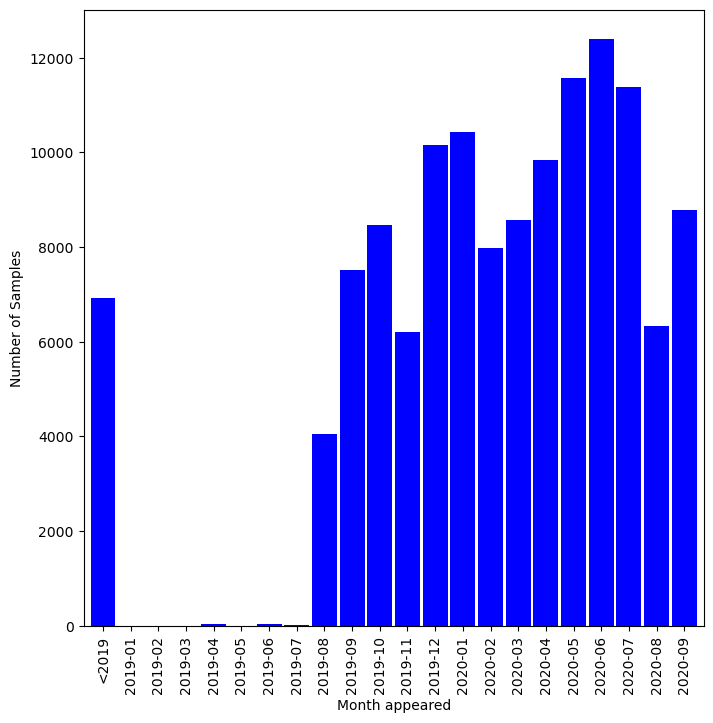

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_monthly_counts_grouped(csv_path):
    # Read CSV assuming comma-separated
    df = pd.read_csv(csv_path)

    # Parse timestamp column
    df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
    df = df.dropna(subset=['timestamp'])

    # Extract year-month period
    df['month'] = df['timestamp'].dt.to_period('M').astype(str)

    # Count number of samples per month
    monthly_counts = df['month'].value_counts().sort_index()

    # Convert index to datetime for easier filtering
    monthly_counts.index = pd.to_datetime(monthly_counts.index)

    # Split into two parts: before 2019 and from 2019 onwards
    before_2019 = monthly_counts[monthly_counts.index < '2019-01']
    after_2019 = monthly_counts[monthly_counts.index >= '2019-01']

    # Sum all entries before 2019
    summarized = pd.Series({'<2019': before_2019.sum()})
    after_2019.index = after_2019.index.strftime('%Y-%m')  # back to string for plotting

    # Combine both for final display
    final_counts = pd.concat([summarized, after_2019])

    # Plot
    plt.figure(figsize=(8, 8))  # Widen the figure for better bar visibility
    final_counts.plot(kind='bar', width=0.9, color="blue")
    plt.xlabel('Month appeared')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=90)

    plt.show()
plot_monthly_counts_grouped("bodmas_metadata.csv")

----------Training on Model_v1_2017----------


Model_v2_2017(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=256, out_features=1, bias=True)
    (17): Sigm

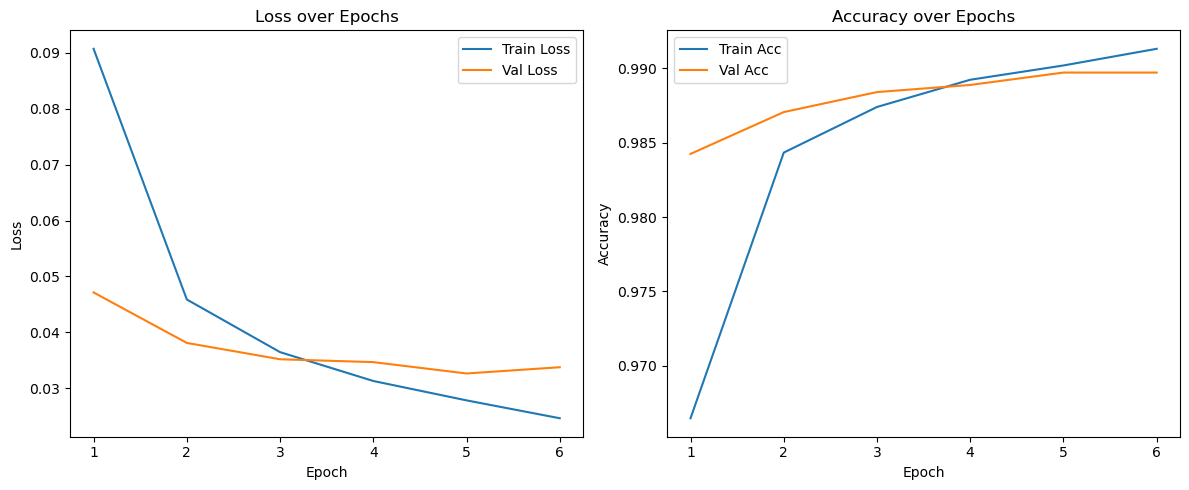

RuntimeError: Error(s) in loading state_dict for Model_v2_2017:
	Missing key(s) in state_dict: "net.1.weight", "net.1.bias", "net.1.running_mean", "net.1.running_var", "net.5.weight", "net.5.bias", "net.5.running_mean", "net.5.running_var", "net.9.weight", "net.9.bias", "net.9.running_mean", "net.9.running_var", "net.12.weight", "net.12.bias", "net.13.weight", "net.13.bias", "net.13.running_mean", "net.13.running_var", "net.16.weight", "net.16.bias". 
	Unexpected key(s) in state_dict: "net.2.weight", "net.2.bias", "net.2.running_mean", "net.2.running_var", "net.2.num_batches_tracked", "net.6.weight", "net.6.bias", "net.6.running_mean", "net.6.running_var", "net.6.num_batches_tracked", "net.10.weight", "net.10.bias", "net.10.running_mean", "net.10.running_var", "net.10.num_batches_tracked", "net.11.weight", "net.11.bias". 
	size mismatch for net.8.weight: copying a param with shape torch.Size([1024, 1024]) from checkpoint, the shape in current model is torch.Size([512, 1024]).
	size mismatch for net.8.bias: copying a param with shape torch.Size([1024]) from checkpoint, the shape in current model is torch.Size([512]).

In [ ]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v1_2017----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v2_2017()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v2_2017_128.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v1_2017"
)

model.load_state_dict(torch.load("models/Model_v1_2017_128.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"], fpr_targets=[0.01, 0.001])

Test Accuracy: 0.989925
Test Precision: 0.991986
Test Recall: 0.987830
Test F1 Score: 0.989904
Test ROC AUC: 0.999028
AUC Score: 0.999028


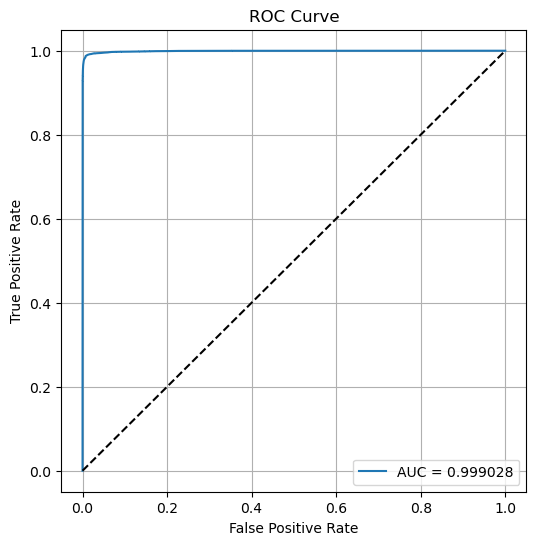

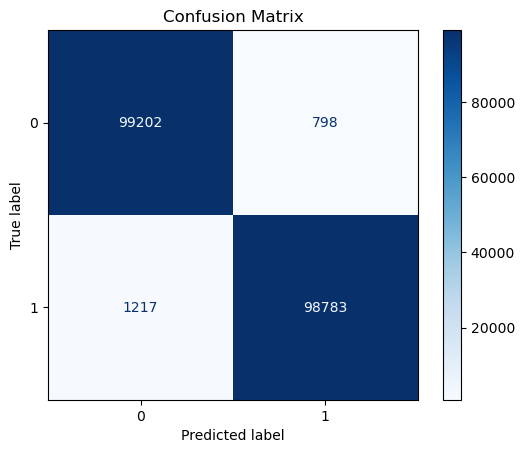


Performance at 1.0% FPR:
Threshold: 0.4059
False Positive Rate: 1.0000%
False Negative Rate: 1.1050%
Detection Rate (TPR): 98.8950%

Performance at 0.1% FPR:
Threshold: 0.9834
False Positive Rate: 0.1000%
False Negative Rate: 4.3480%
Detection Rate (TPR): 95.6520%


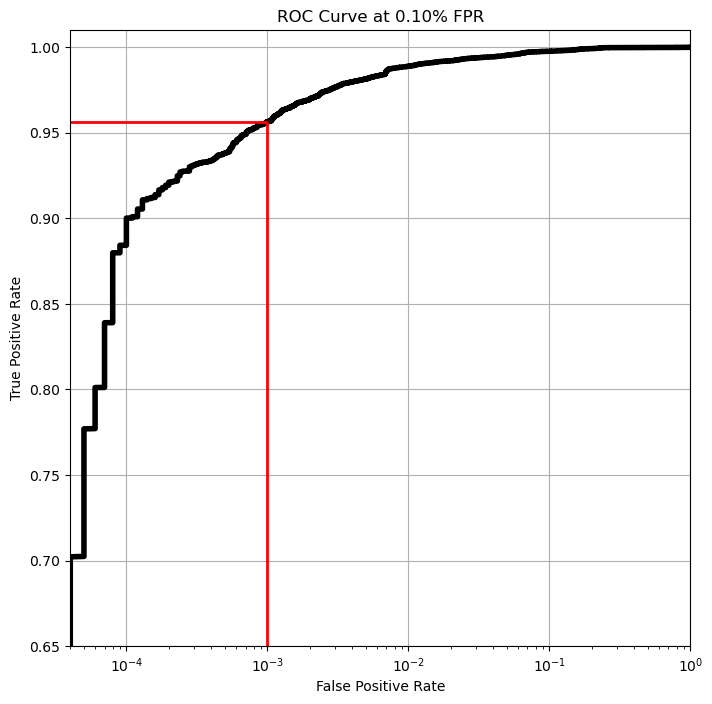

In [5]:
model.load_state_dict(torch.load("models/Model_v2_2017_128.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"], fpr_targets=[0.01, 0.001])

----------Training on Model_v1_2017----------


Model_v1_2017(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Linear(in_features=1024, out_features=1, bias=True)
    (12): Sigmoid()
  )
)
Epoch 1 | Train Loss: 0.0746 | Train Acc: 0.9725 | Val Loss: 0.0459 | Val Acc: 0.9844
Saved model
Epoch 2 | Train Loss: 0.0448 | Train Acc: 0.9842 | Val Loss: 0.0393 | Val Acc: 0.9868
Saved model
Epoch 3 | Train Loss: 0.0364 | Train Acc

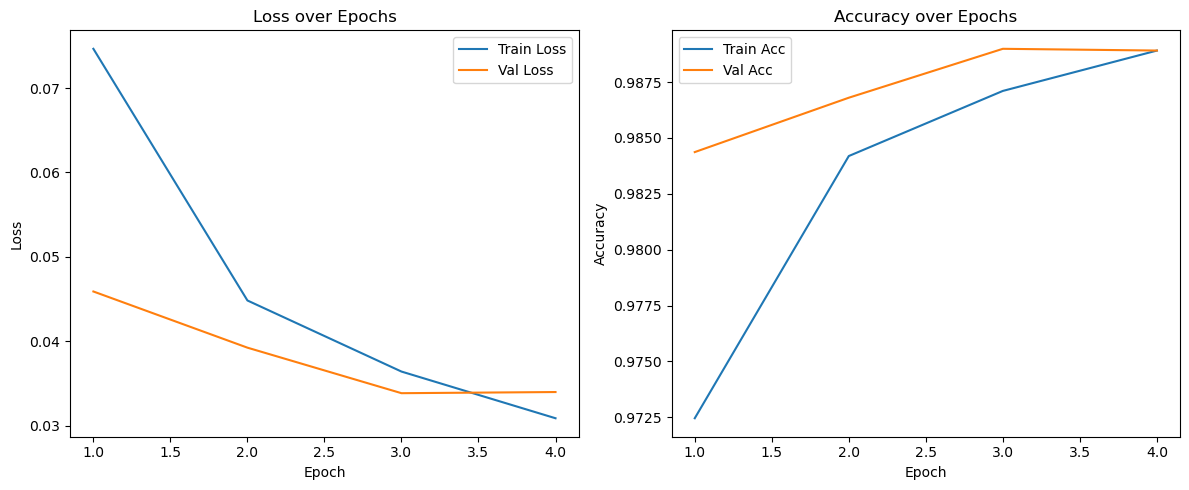

Test Accuracy: 0.988415
Test Precision: 0.992766
Test Recall: 0.984000
Test F1 Score: 0.988364
Test ROC AUC: 0.999167
AUC Score: 0.999167


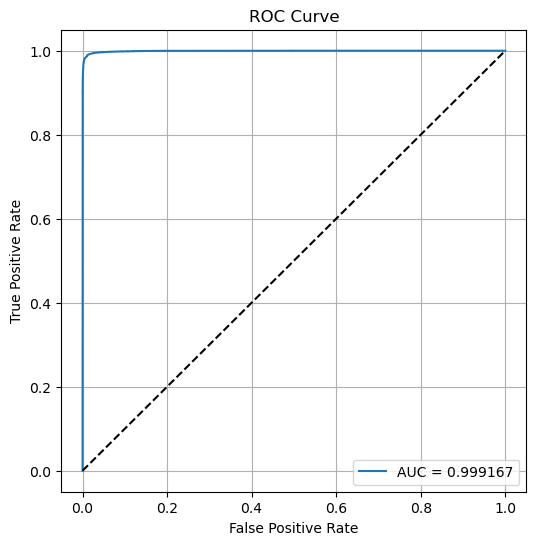

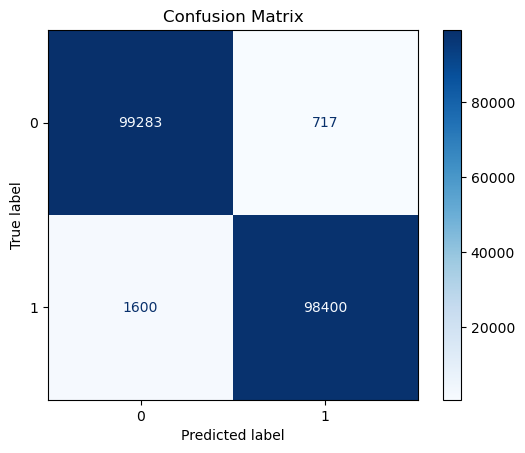


Performance at 1.0% FPR:
Threshold: 0.3958
False Positive Rate: 1.0000%
False Negative Rate: 1.3650%
Detection Rate (TPR): 98.6350%

Performance at 0.1% FPR:
Threshold: 0.9628
False Positive Rate: 0.1000%
False Negative Rate: 5.0900%
Detection Rate (TPR): 94.9100%


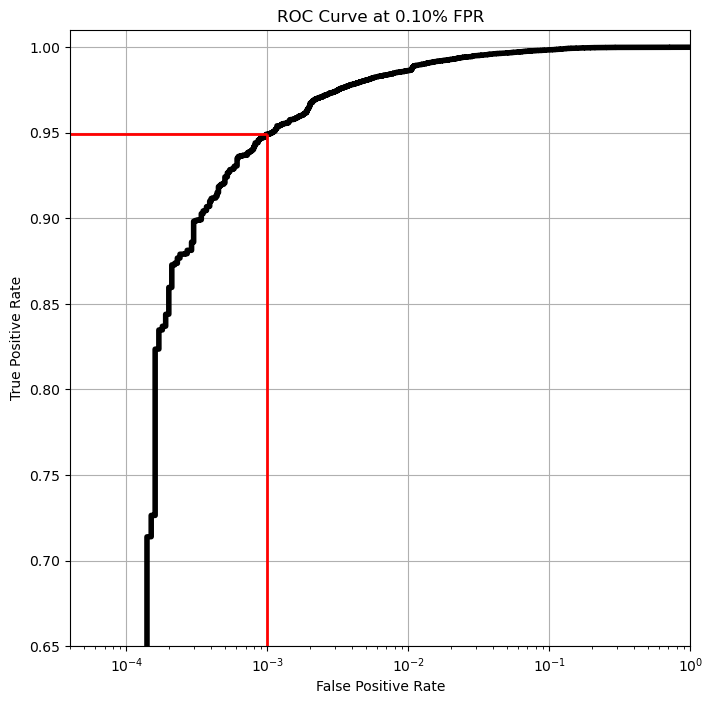

In [3]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v1_2017----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v1_2017()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v1_2017_new.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v1_2017"
)

model.load_state_dict(torch.load("models/Model_v1_2017_new.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"], fpr_targets=[0.01, 0.001])

----------Training on Model_v1_2017----------


Model_v1_2017(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=1024, out_features=1, bias=True)
    (13): Sigmoid()
  )
)
Epoch 1 | Train Loss: 0.0793 | Train Acc: 0.9710 | Val Loss: 0.0426 | Val Acc: 0.9852
Saved model
Epoch 2 | Train Loss: 0.0469 | Train Acc: 0.9833 | Val Loss: 0.0406 | Val Acc: 0.9865
Saved model


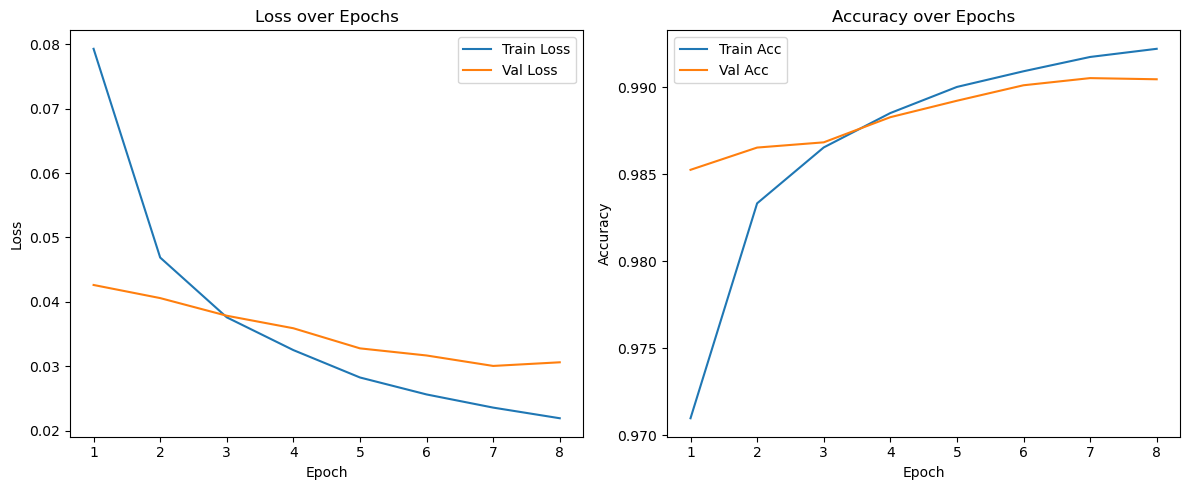

Test Accuracy: 0.990345
Test Precision: 0.992893
Test Recall: 0.987760
Test F1 Score: 0.990320
Test ROC AUC: 0.999137
AUC Score: 0.999137


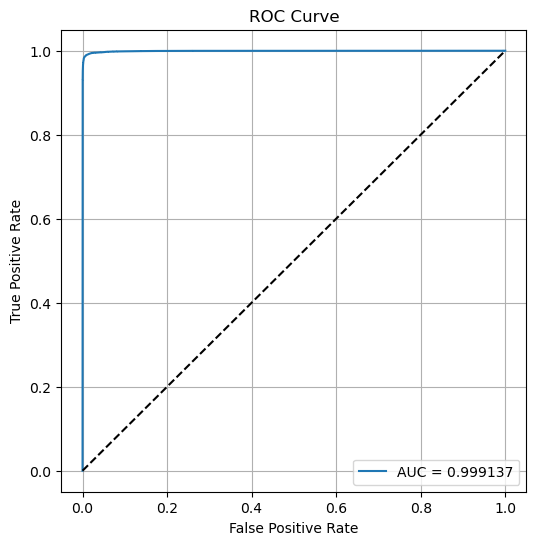

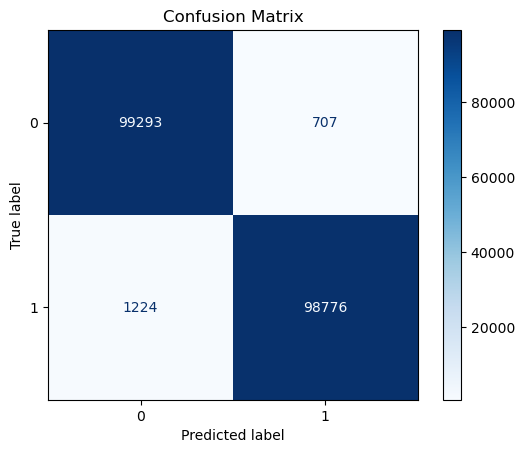


Performance at 1.0% FPR:
Threshold: 0.3501
False Positive Rate: 1.0000%
False Negative Rate: 0.9890%
Detection Rate (TPR): 99.0110%

Performance at 0.1% FPR:
Threshold: 0.9710
False Positive Rate: 0.1000%
False Negative Rate: 3.6880%
Detection Rate (TPR): 96.3120%


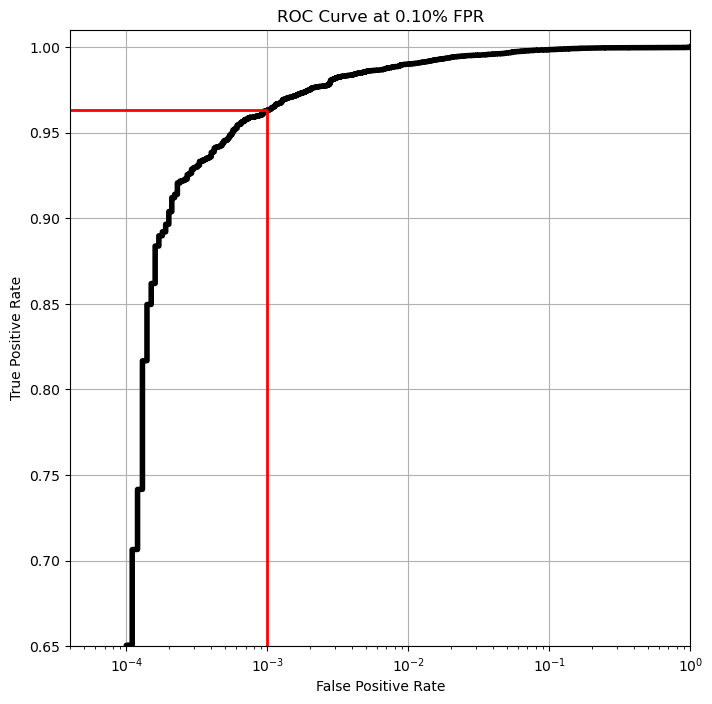

In [ ]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v1_2017----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v1_2017()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v1_2017.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v1_2017"
)

model.load_state_dict(torch.load("models/Model_v1_2017.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"], fpr_targets=[0.01, 0.001])

----------Training on Model_v5_BIG----------


True
Model_BIG_v4(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=2048, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=2048, out_features=1024, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=1024, out_features=1, bias=True)
    (13): Sigmoid()
  )
)
Epoch 1 | Train Loss: 0.1418 | Train Acc: 0.9438 | Val Loss: 0.0675 | Val Acc: 0.9759
Saved model
Epoch 2 | Train Loss: 0.0698 | Train Acc: 0.9747 | Val Loss: 0.0496 | Val Acc: 0.9838
Saved mod

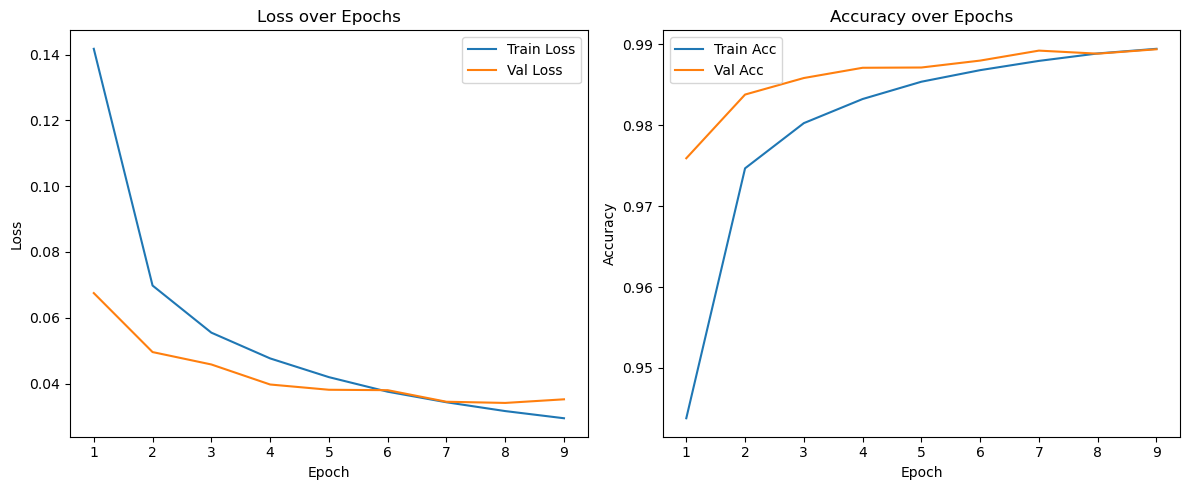

Test Accuracy: 0.989280
Test Precision: 0.989574
Test Recall: 0.988980
Test F1 Score: 0.989277
Test ROC AUC: 0.999108
AUC Score: 0.999108


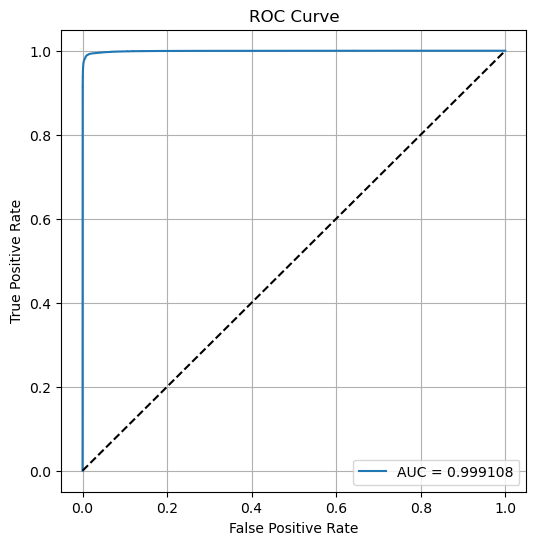

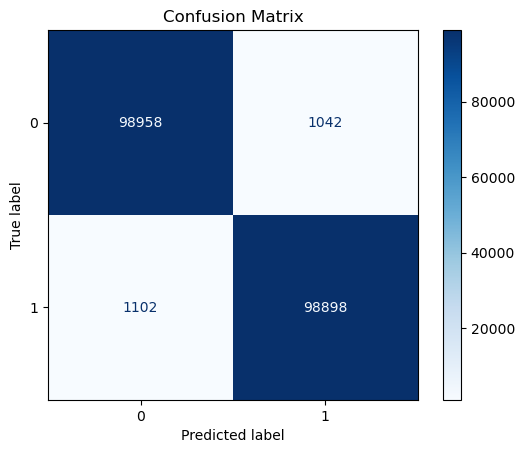


Performance at 1.0% FPR:
Threshold: 0.5190
False Positive Rate: 1.0000%
False Negative Rate: 1.1270%
Detection Rate (TPR): 98.8730%

Performance at 0.1% FPR:
Threshold: 0.9817
False Positive Rate: 0.1000%
False Negative Rate: 4.4720%
Detection Rate (TPR): 95.5280%


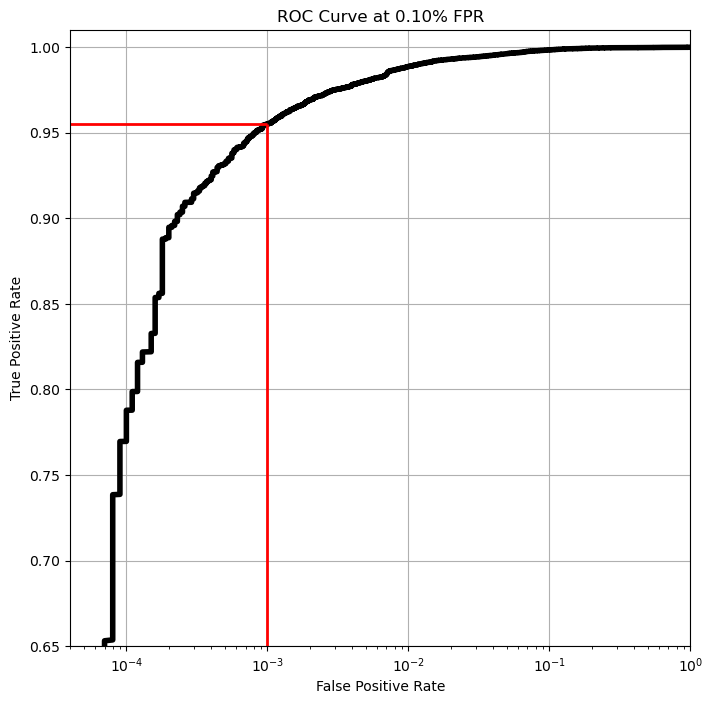

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class Model_BIG_v4(nn.Module):
    def __init__(self, input_dim=2351):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048),
            nn.Dropout(0.5),

            nn.Linear(2048, 2048),
            nn.ReLU(),
            nn.BatchNorm1d(2048), 
            nn.Dropout(0.5), 

            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(0.5), 

            nn.Linear(1024, 1),
            nn.Sigmoid()
        )


    def forward(self, x):
        return self.net(x)
    

# 3. test + train

import torch
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v5_BIG----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())
model = Model_BIG_v4()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_BIG_v5_2017_128.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_BIG_v5"
)

model.load_state_dict(torch.load("models/Model_BIG_v5_2017_128.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"], fpr_targets=[0.01, 0.001])

In [6]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v1_2017----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v1_2017()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_BIG.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_BIG"
)
model.load_state_dict(torch.load("models/Model_BIG.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"], fpr_targets=[0.01, 0.001])

----------Training on Model_v1_2017----------


Model_v1_2017(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=1024, bias=True)
    (9): ReLU()
    (10): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Linear(in_features=1024, out_features=1, bias=True)
    (12): Sigmoid()
  )
)
Epoch 1 | Train Loss: 0.1278 | Train Acc: 0.9487 | Val Loss: 0.0871 | Val Acc: 0.9660
Saved model


KeyboardInterrupt: 

----------Training on Model_v2_2017----------


Model_v2_2017(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=256, out_features=1, bias=True)
    (17): Sigm

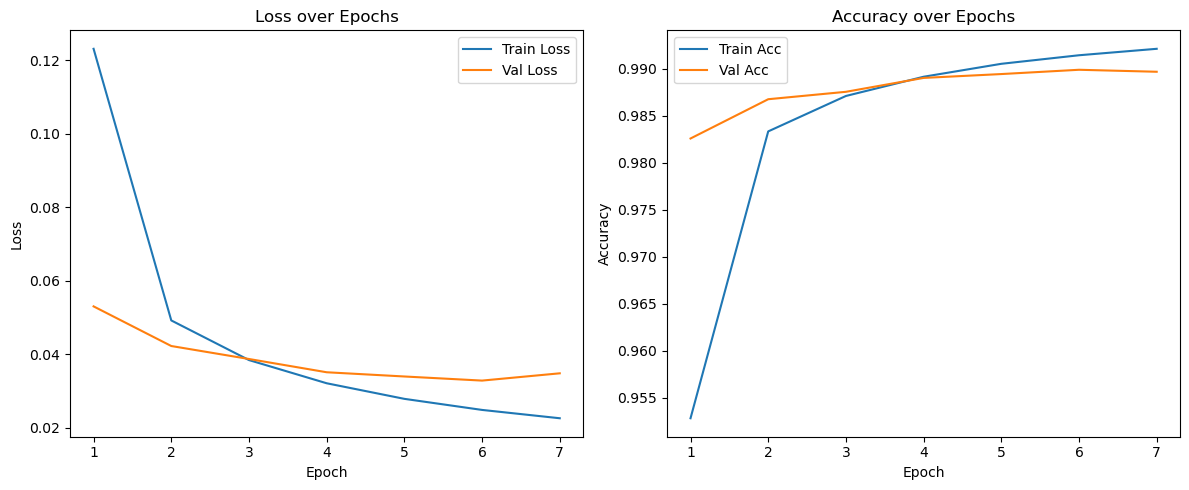

Test Accuracy: 0.990280
Test Precision: 0.991519
Test Recall: 0.989020
Test F1 Score: 0.990268
Test ROC AUC: 0.999208
AUC Score: 0.999208


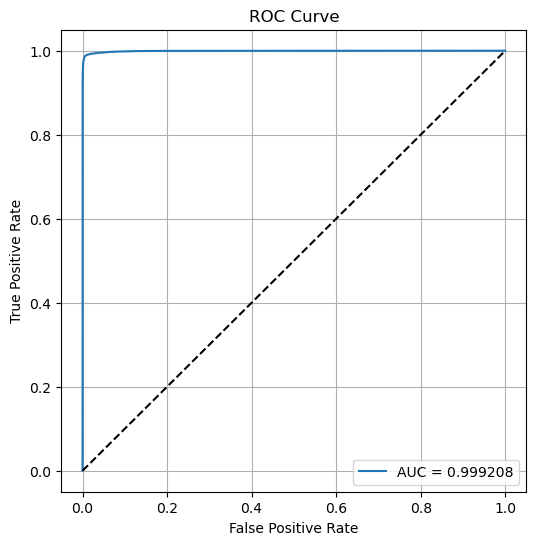

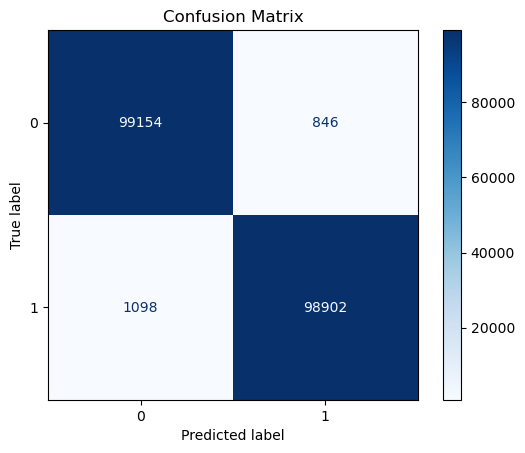


Performance at 1.0% FPR:
Threshold: 0.4081
False Positive Rate: 0.9990%
False Negative Rate: 1.0110%
Detection Rate (TPR): 98.9890%

Performance at 0.1% FPR:
Threshold: 0.9860
False Positive Rate: 0.1000%
False Negative Rate: 3.8540%
Detection Rate (TPR): 96.1460%


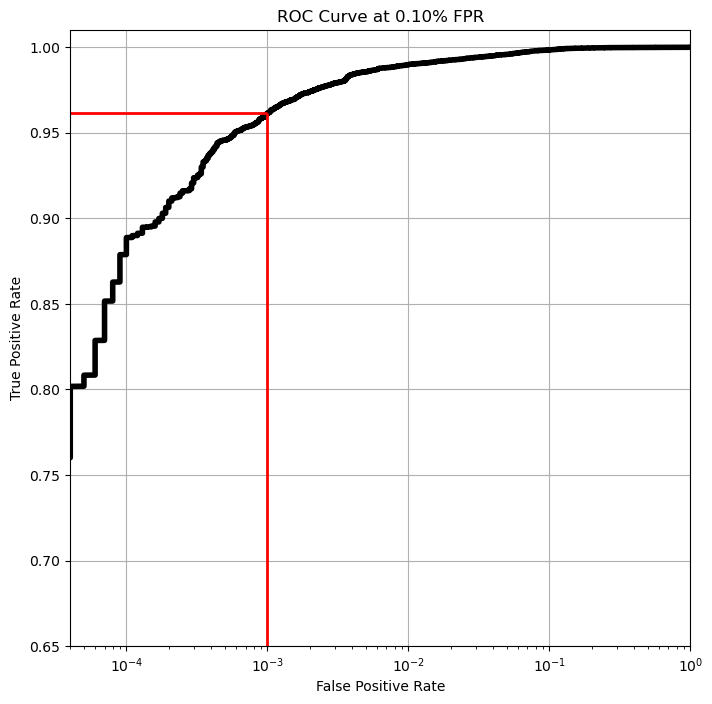

In [3]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v2_2017----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v2_2017()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v2_2017_1024.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v2_2017"
)

model.load_state_dict(torch.load("models/Model_v2_2017_1024.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"], fpr_targets=[0.01, 0.001])

----------Training on Model_v2_2017----------


Model_v2_2017(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=256, out_features=1, bias=True)
    (17): Sigm

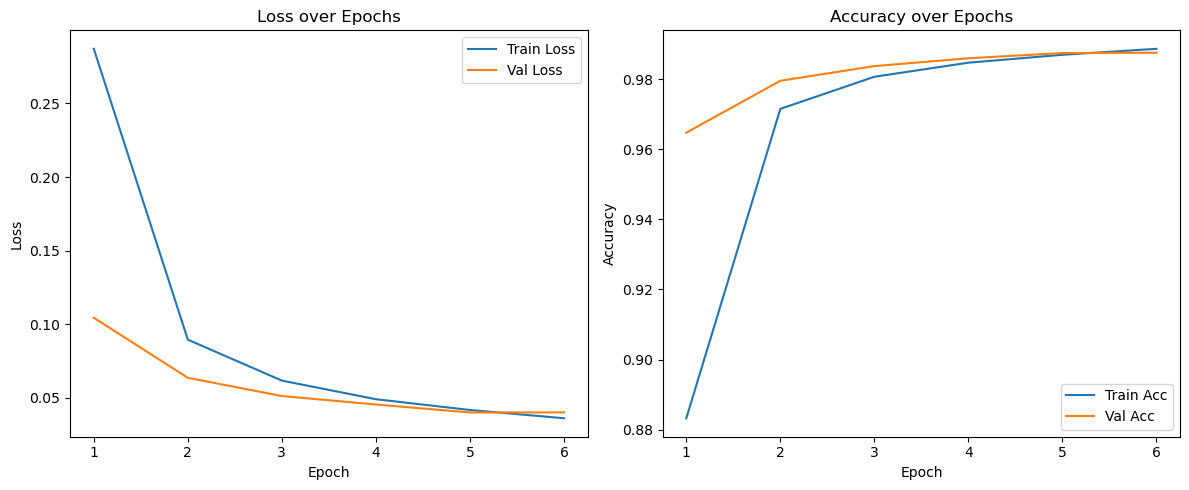

Test Accuracy: 0.988625
Test Precision: 0.989815
Test Recall: 0.987410
Test F1 Score: 0.988611
Test ROC AUC: 0.999148
AUC Score: 0.999148


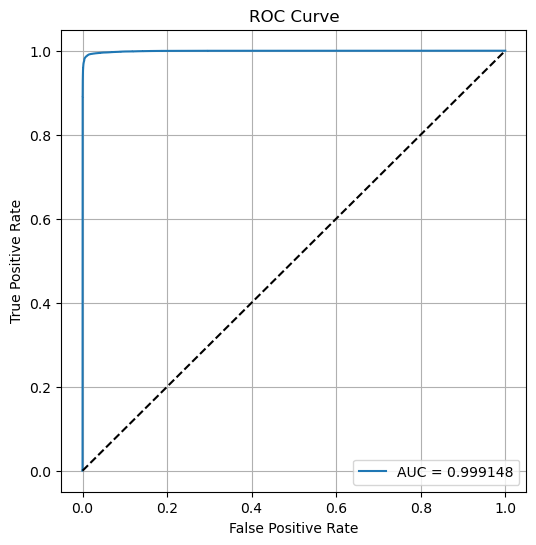

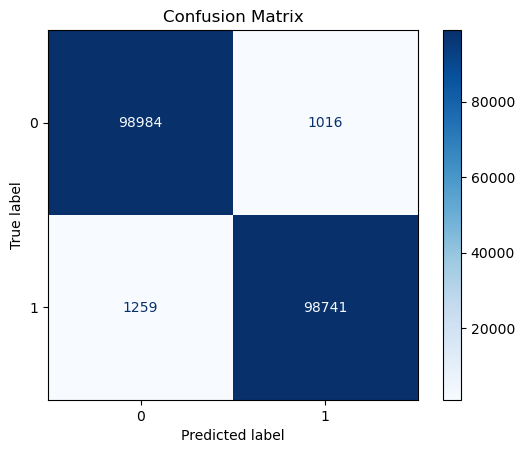


Performance at 1.0% FPR:
Threshold: 0.5106
False Positive Rate: 1.0000%
False Negative Rate: 1.2660%
Detection Rate (TPR): 98.7340%

Performance at 0.1% FPR:
Threshold: 0.9797
False Positive Rate: 0.1000%
False Negative Rate: 5.0970%
Detection Rate (TPR): 94.9030%


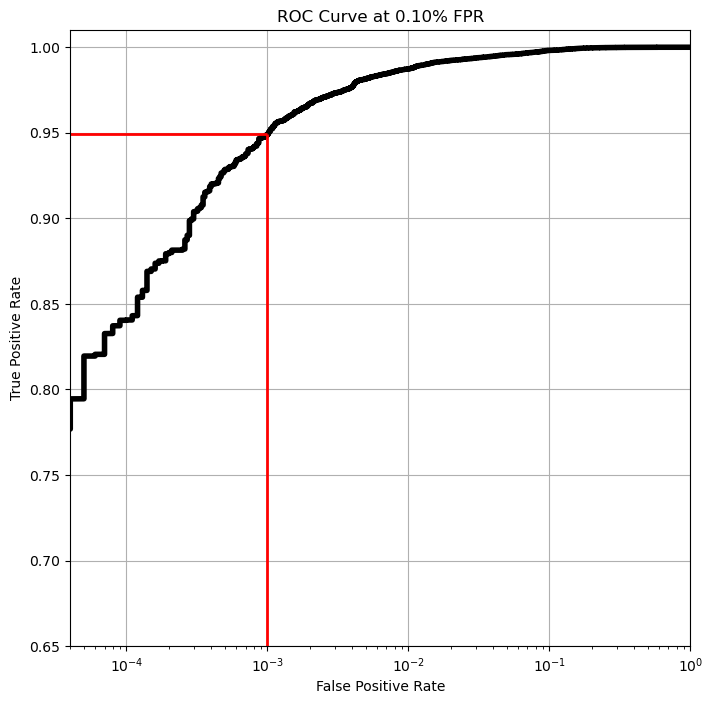

In [5]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v2_2017----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v2_2017()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v2_2017_8192.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v2_2017"
)

model.load_state_dict(torch.load("models/Model_v2_2017_8192.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"], fpr_targets=[0.01, 0.001])

----------Training on Model_v2_2017----------


Model_v2_2017(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=256, out_features=1, bias=True)
    (17): Sigm

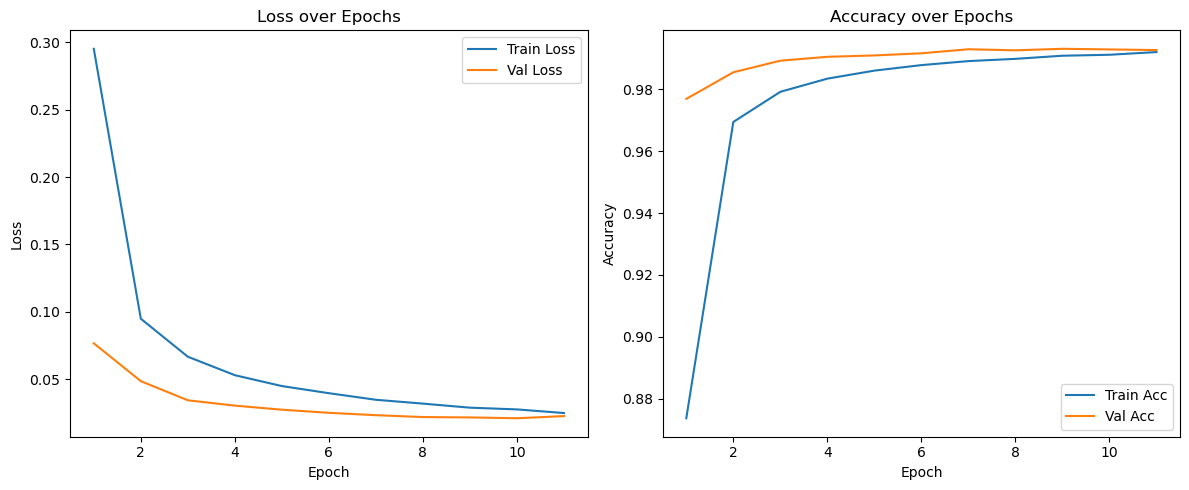

Test Accuracy: 0.988845
Test Precision: 0.990862
Test Recall: 0.986790
Test F1 Score: 0.988822
Test ROC AUC: 0.999186
AUC Score: 0.999186


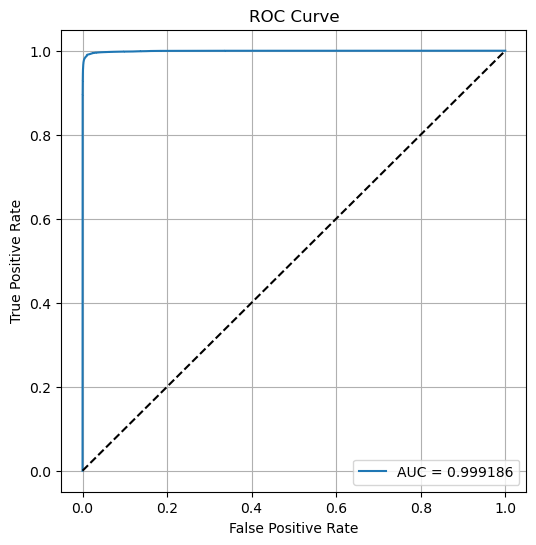

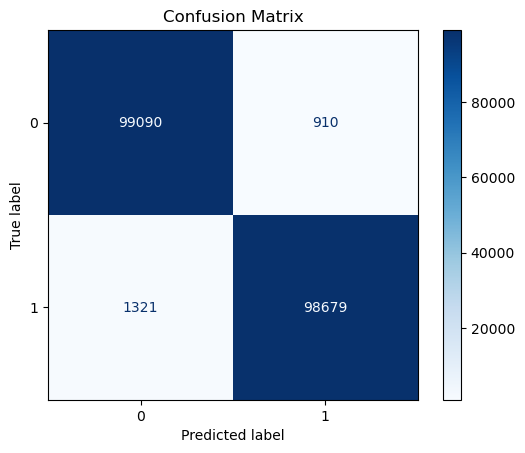

In [4]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v2_2017----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v2_2017()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v2_2017.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v2_2017"
)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Test Accuracy: 0.988045
Test Precision: 0.990010
Test Recall: 0.986040
Test F1 Score: 0.988021
Test ROC AUC: 0.999221
AUC Score: 0.999221


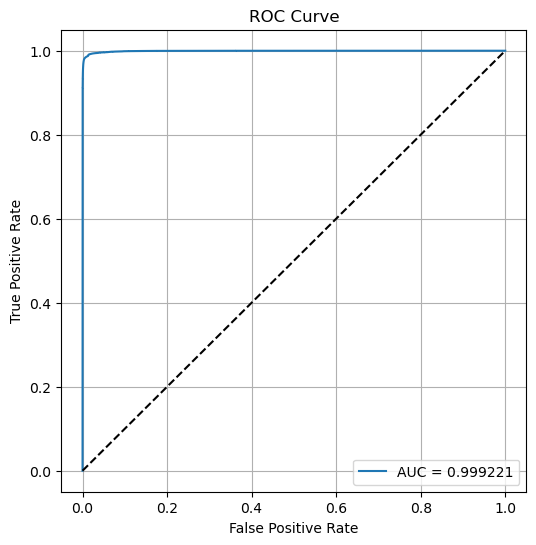

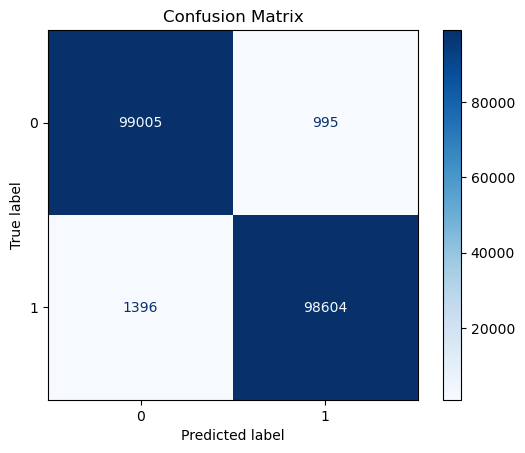


Performance at 1.0% FPR:
Threshold: 0.4903
False Positive Rate: 1.0000%
False Negative Rate: 1.3850%
Detection Rate (TPR): 98.6150%

Performance at 0.1% FPR:
Threshold: 0.9908
False Positive Rate: 0.0990%
False Negative Rate: 4.5060%
Detection Rate (TPR): 95.4940%


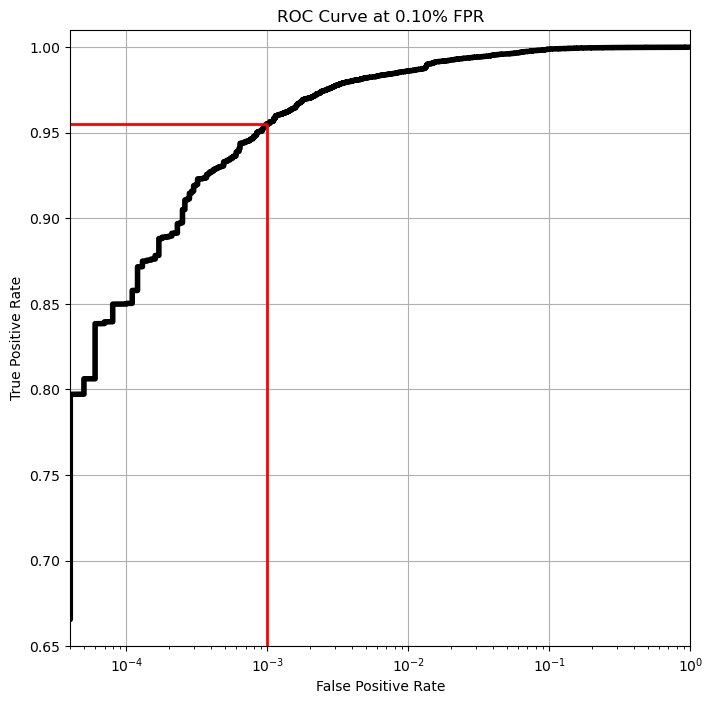

In [4]:
import torch.nn as nn
import torch.optim as optim
import idk

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v2_2017().to(device)

model.load_state_dict(torch.load("models/Model_v2_2017.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"])

In [ ]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v1_2017_testing----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v1_2017()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v1_2017_testing.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v1_2017_testing"
)

model.load_state_dict(torch.load("models/Model_v1_2017_testing.pth"))
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])


----------Training on Model_v1_2017_testing----------




NameError: name 'Model_v1_2017' is not defined

Model_v2_2017(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=256, out_features=1, bias=True)
    (17): Sigmoid()
  )
)
Test Accuracy: 0.988150
Test Precisi

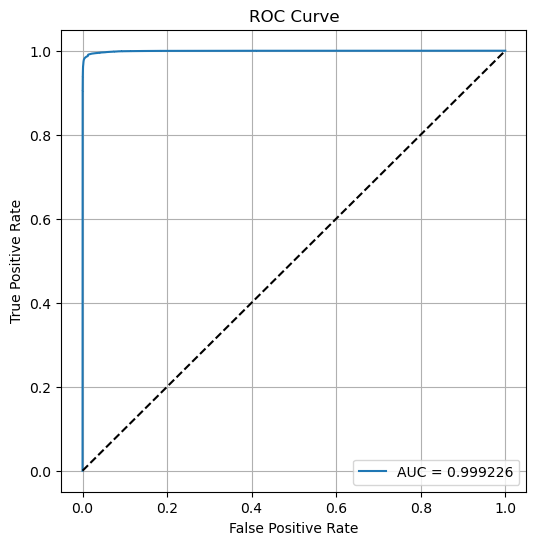

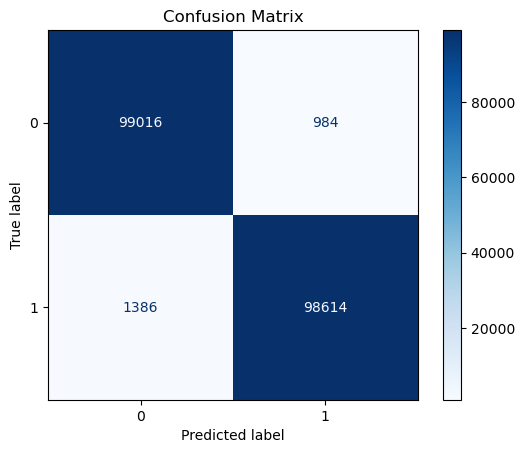


Performance at 1.0% FPR:
Threshold: 0.4827
False Positive Rate: 1.0000%
False Negative Rate: 1.3790%
Detection Rate (TPR): 98.6210%

Performance at 0.1% FPR:
Threshold: 0.9896
False Positive Rate: 0.1000%
False Negative Rate: 4.1880%
Detection Rate (TPR): 95.8120%


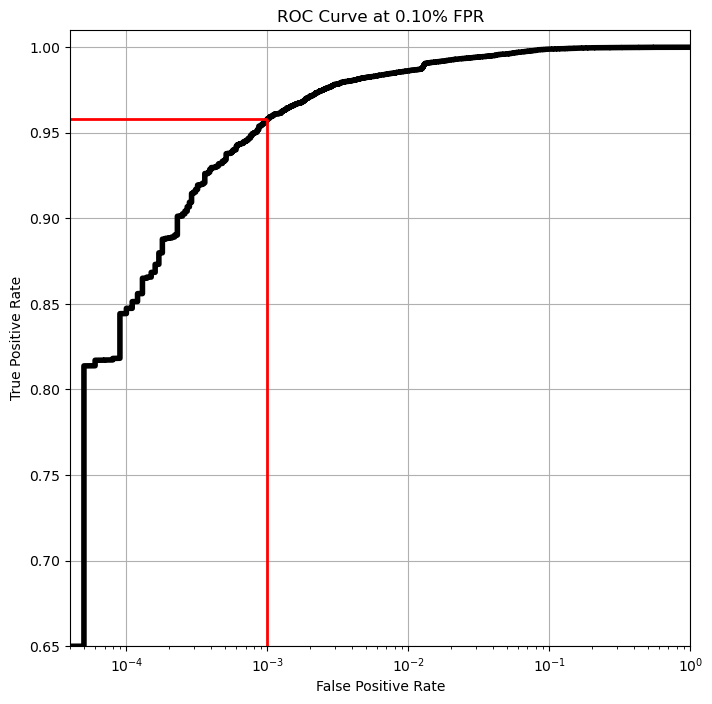

In [4]:
import torch.nn as nn
import torch.optim as optim
import idk

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v2_2017()
model.load_state_dict(torch.load("models/Model_v2_2017.pth"))
model.to(device)
print(model)
test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"])

----------Training on Model_v2_2017_testing----------


Model_v2_2017(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=256, out_features=1, bias=True)
    (1

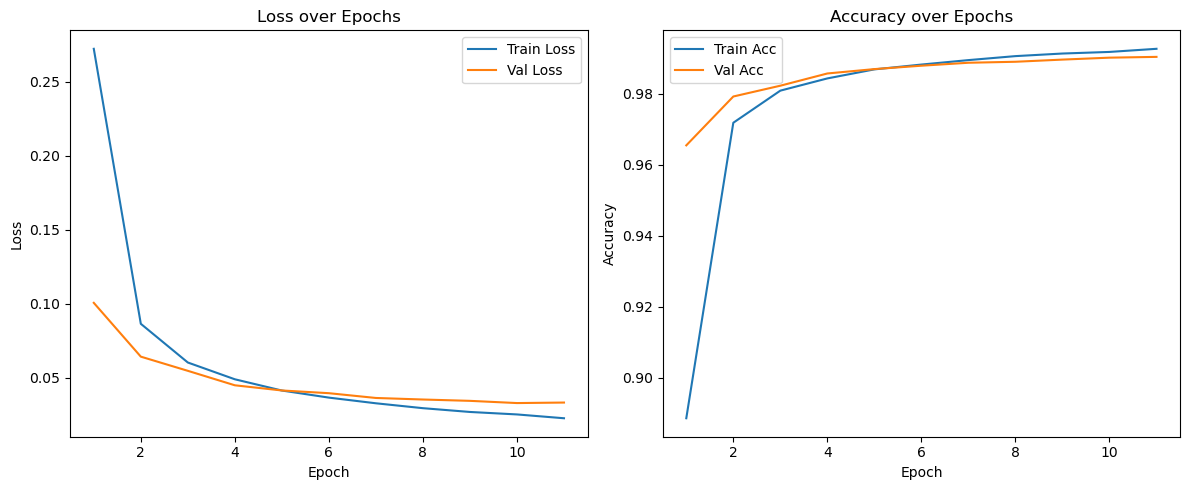

Test Accuracy: 0.990615
Test Precision: 0.991288
Test Recall: 0.989930
Test F1 Score: 0.990609
Test ROC AUC: 0.999274
AUC Score: 0.999274


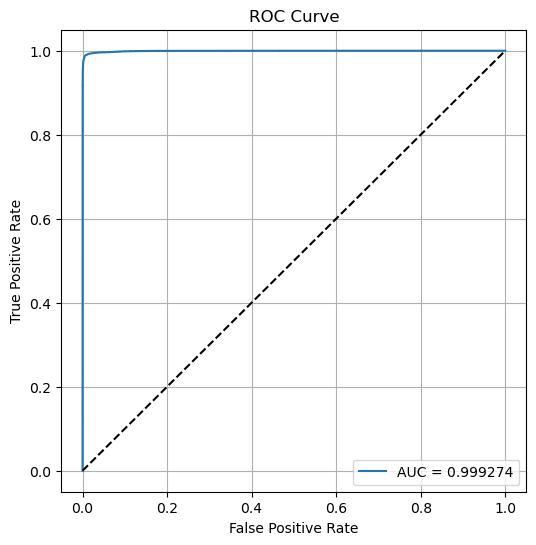

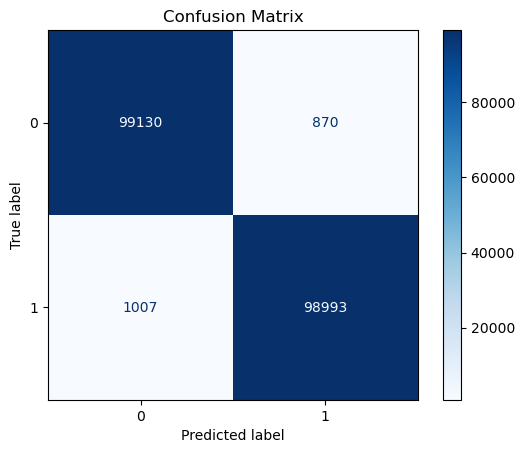


Performance at 1.0% FPR:
Threshold: 0.4162
False Positive Rate: 0.9990%
False Negative Rate: 0.9570%
Detection Rate (TPR): 99.0430%

Performance at 0.1% FPR:
Threshold: 0.9910
False Positive Rate: 0.0980%
False Negative Rate: 3.8400%
Detection Rate (TPR): 96.1600%


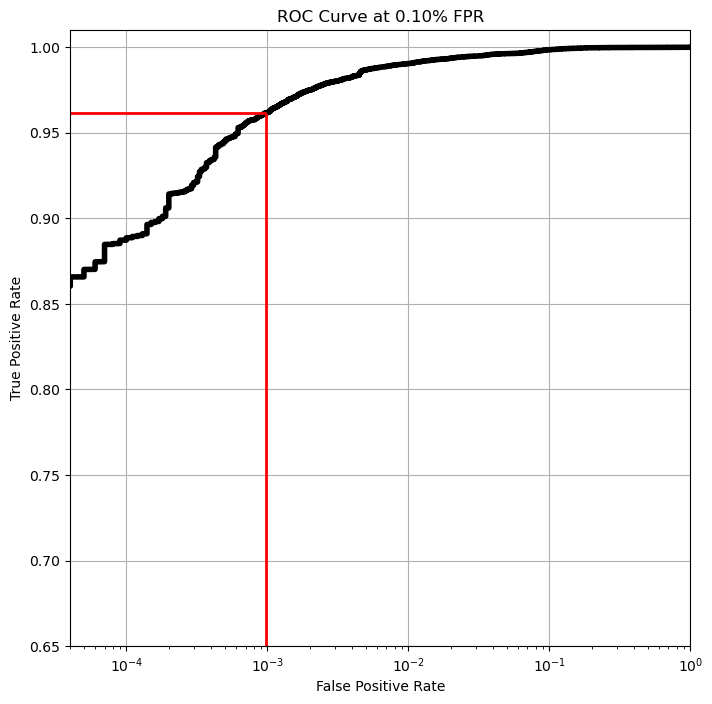

In [5]:
import torch.nn as nn
import torch.optim as optim
import idk

print("----------Training on Model_v2_2017_testing----------\n\n")


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_v2_2017()
print(model)
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "models/Model_v2_2017_testing.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="Model_v2_2017_testing"
)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])
idk.evaluate_at_fpr_thresholds(test_results["labels"], test_results["probs"])


DNN


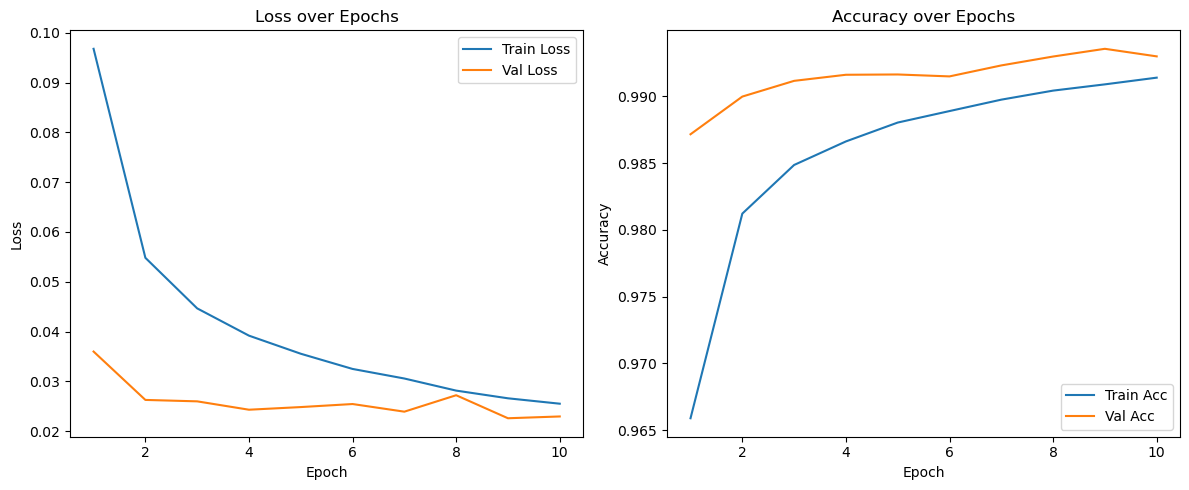

Test Accuracy: 0.5286
Test Precision: 0.5150
Test Recall: 0.9854
Test F1 Score: 0.6764
Test ROC AUC: 0.5295
AUC Score: 0.5295


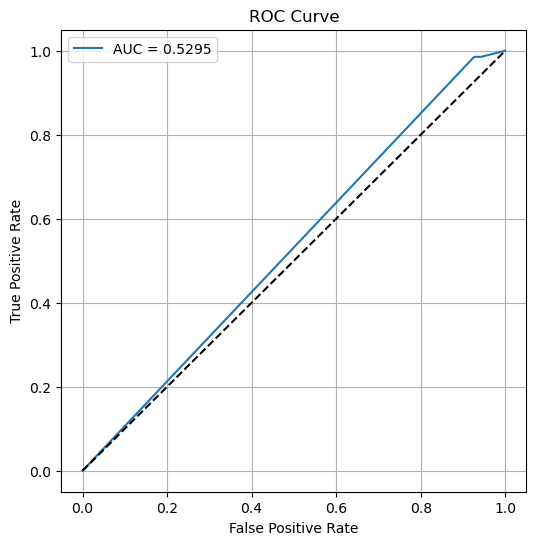

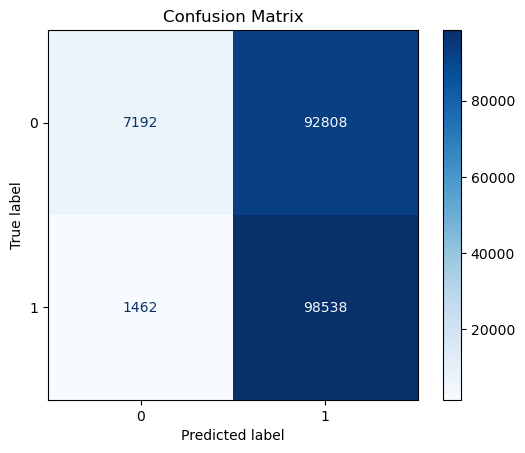

In [29]:
idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="DNN"
)

from torch.utils.data import TensorDataset, DataLoader

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])

In [33]:
import torch.nn as nn
import torch.optim as optim
import idk



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FirstNN()
results = idk.train_model(model, train_loader, val_loader, device, 10, 0.001, "firstNN2.pth")

Epoch 1 | Train Loss: 0.0783 | Train Acc: 0.9715 | Val Loss: 0.0328 | Val Acc: 0.9883
Saved model
Epoch 2 | Train Loss: 0.0464 | Train Acc: 0.9839 | Val Loss: 0.0247 | Val Acc: 0.9910
Saved model
Epoch 3 | Train Loss: 0.0359 | Train Acc: 0.9873 | Val Loss: 0.0244 | Val Acc: 0.9913
Saved model
Epoch 4 | Train Loss: 0.0311 | Train Acc: 0.9890 | Val Loss: 0.0242 | Val Acc: 0.9917
Saved model
Epoch 5 | Train Loss: 0.0287 | Train Acc: 0.9899 | Val Loss: 0.0287 | Val Acc: 0.9901
Epoch 6 | Train Loss: 0.0261 | Train Acc: 0.9907 | Val Loss: 0.0256 | Val Acc: 0.9914
Epoch 7 | Train Loss: 0.0236 | Train Acc: 0.9916 | Val Loss: 0.0221 | Val Acc: 0.9923
Saved model
Epoch 8 | Train Loss: 0.0224 | Train Acc: 0.9921 | Val Loss: 0.0241 | Val Acc: 0.9927
Epoch 9 | Train Loss: 0.0211 | Train Acc: 0.9925 | Val Loss: 0.0225 | Val Acc: 0.9926
Epoch 10 | Train Loss: 0.0199 | Train Acc: 0.9929 | Val Loss: 0.0227 | Val Acc: 0.9937


DNN


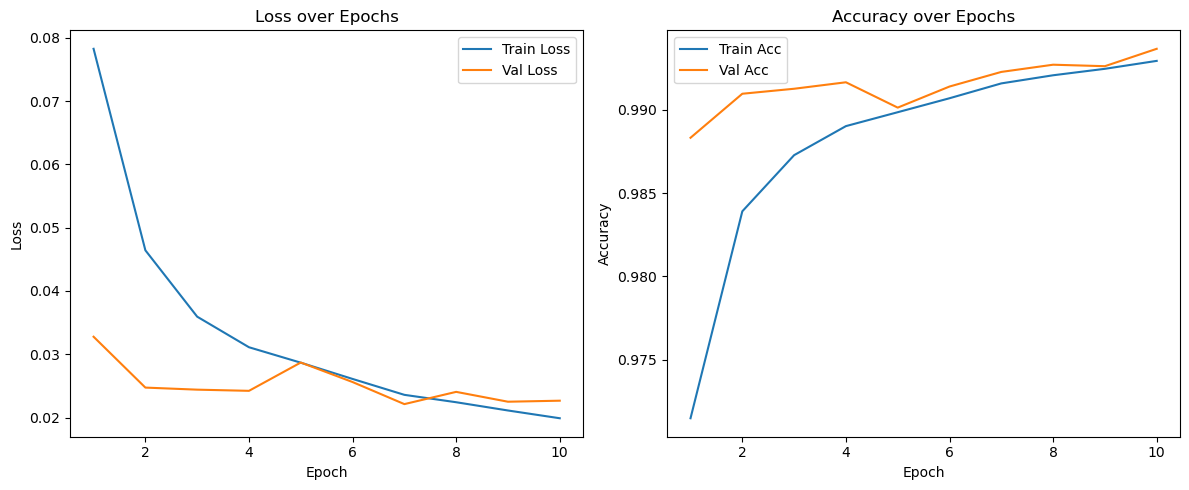

Test Accuracy: 0.5259
Test Precision: 0.5135
Test Recall: 0.9848
Test F1 Score: 0.6750
Test ROC AUC: 0.5265
AUC Score: 0.5265


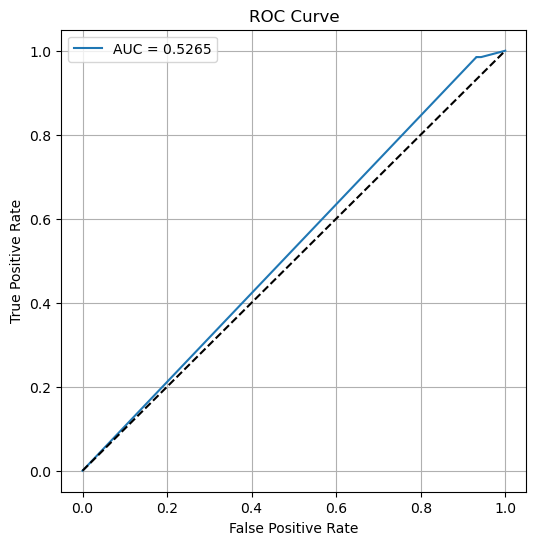

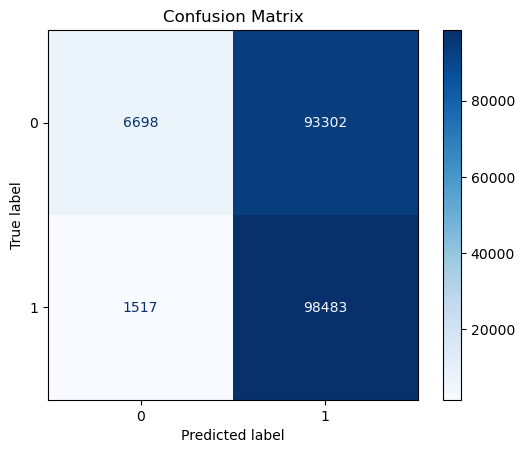

In [34]:
idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="DNN"
)

from torch.utils.data import TensorDataset, DataLoader

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])

In [5]:
import torch.nn as nn
import torch.optim as optim
import idk



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DNN3()
results = idk.train_model(model, train_loader, val_loader, device, 20, 0.0001, "DNN3.pth")

idk.plot_training_metrics(
    results["train_losses"],
    results["val_losses"],
    results["train_accuracies"],
    results["val_accuracies"],
    model_name="DNN3"
)

from torch.utils.data import TensorDataset, DataLoader

X_test_tensor = torch.from_numpy(X_test).float()
y_test_tensor = torch.from_numpy(y_test).float()

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=8192, shuffle=False)

test_results = idk.evaluate_model_on_test(model, test_loader, device)

idk.plot_roc_curve(test_results["labels"], test_results["probs"])
idk.plot_confusion_matrix(test_results["labels"], test_results["probs"])

Epoch 1 | Train Loss: 0.1263 | Train Acc: 0.9525 | Val Loss: 0.0357 | Val Acc: 0.9885
Saved model
Epoch 2 | Train Loss: 0.0379 | Train Acc: 0.9874 | Val Loss: 0.0233 | Val Acc: 0.9926
Saved model
Epoch 3 | Train Loss: 0.0249 | Train Acc: 0.9919 | Val Loss: 0.0213 | Val Acc: 0.9925
Saved model
Epoch 4 | Train Loss: 0.0179 | Train Acc: 0.9943 | Val Loss: 0.0209 | Val Acc: 0.9933
Saved model
Epoch 5 | Train Loss: 0.0144 | Train Acc: 0.9955 | Val Loss: 0.0217 | Val Acc: 0.9935
Epoch 6 | Train Loss: 0.0124 | Train Acc: 0.9961 | Val Loss: 0.0217 | Val Acc: 0.9924
Epoch 7 | Train Loss: 0.0098 | Train Acc: 0.9969 | Val Loss: 0.0181 | Val Acc: 0.9944
Saved model


KeyboardInterrupt: 

FirstNN(
  (net): Sequential(
    (0): Linear(in_features=2351, out_features=2048, bias=True)
    (1): BatchNorm1d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=2048, out_features=1024, bias=True)
    (5): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.5, inplace=False)
    (12): Linear(in_features=512, out_features=256, bias=True)
    (13): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=256, out_features=1, bias=True)
    (17): Sigmoid()
  )
)


C:\Users\Alisa\AppData\Local\Temp\ipykernel_4680\655580116.py:14: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_numpy.cpp:209.)
  X_test_tensor = torch.from_numpy(X_test).float()


Test Accuracy: 0.9880
Test Precision: 0.9913
Test Recall: 0.9847
Test F1 Score: 0.9880
Test ROC AUC: 0.9987
AUC Score: 0.9987


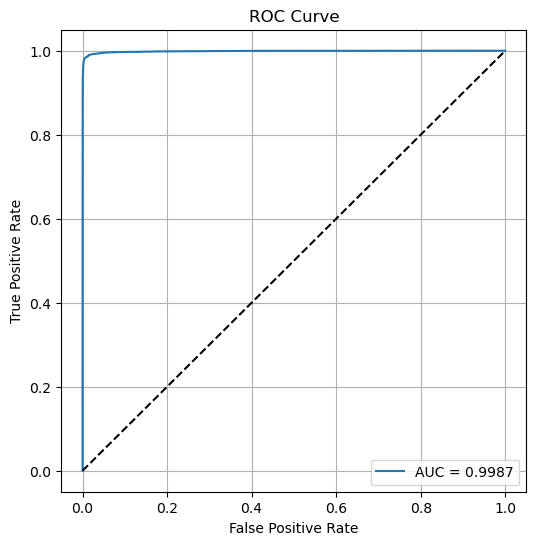

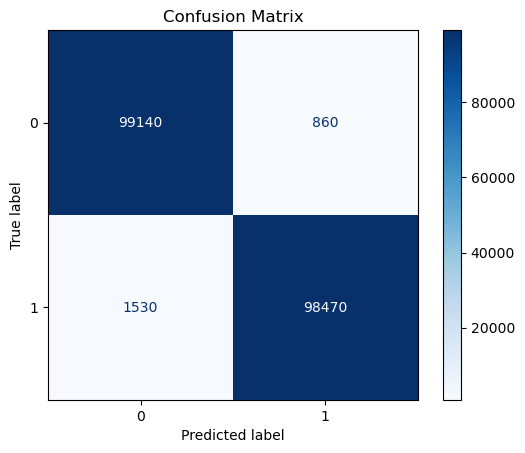

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

filename = 'bodmas.npz'
data = np.load(filename)
X = data['X']  # all the feature vectors
y = data['y']  # labels, 0 as benign, 1 as malicious

X_trimmed = X[:, :-30]


print(X_trimmed.shape, y.shape)
print(X[:100], y[:100])



(134435, 2351) (134435,)
[[0.05674198 0.00801749 0.00776239 ... 0.         0.         0.        ]
 [0.00706228 0.00449971 0.00449817 ... 0.         0.         0.        ]
 [0.0209748  0.00469876 0.00400208 ... 0.         0.         0.        ]
 ...
 [0.2940265  0.01571757 0.00341607 ... 0.         0.         0.        ]
 [0.14850488 0.0116099  0.00876522 ... 0.         0.         0.        ]
 [0.01728023 0.00414438 0.00397285 ... 0.         0.         0.        ]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:

X_train, X_test, y_train, y_test = train_test_split(
    X_trimmed, y, test_size=0.25, random_state=19, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.15, random_state=19, stratify=y_train
)

print(X_train.shape, X_val.shape, X_test.shape)

(85702, 2351) (15124, 2351) (33609, 2351)


In [3]:
import os


print(X_train)


with open("F://big_dataset//X_train1.dat", "ab") as f:
    X_train.astype(np.float32).tofile(f)

with open("F://big_dataset//y_train1.dat", "ab") as f:
    y_train.astype(np.float32).tofile(f)

with open("F://big_dataset//X_test1.dat", "ab") as f:
    X_test.astype(np.float32).tofile(f)

with open("F://big_dataset//y_test1.dat", "ab") as f:
    y_test.astype(np.float32).tofile(f)

with open("F://big_dataset//y_val1.dat", "ab") as f:
    y_val.astype(np.float32).tofile(f)

with open("F://big_dataset//X_val1.dat", "ab") as f:
    X_val.astype(np.float32).tofile(f)



[[0.12190697 0.00711498 0.00634344 ... 0.         0.         0.        ]
 [0.08060584 0.00417505 0.00400744 ... 0.         0.         0.        ]
 [0.05263621 0.0048395  0.00151345 ... 0.         0.         0.        ]
 ...
 [0.02354195 0.00392933 0.00402101 ... 0.         0.         0.        ]
 [0.08706257 0.00804419 0.00528086 ... 0.         0.         0.        ]
 [0.6662568  0.00188555 0.00172159 ... 0.         0.         0.        ]]


In [2]:
import feature_extractors

data_dir = "F://ember_dataset//ember"

X_train, y_train, X_val, y_val, X_test, y_test = feature_extractors.read_vectorized_features_2(data_dir)
print(X_train.shape)

(510000, 2351)


In [ ]:
import os
import numpy as np

with open("F://big_dataset//X_train.dat", "ab") as f:
    X_train.astype(np.float32).tofile(f)


In [3]:
import pandas as pd


df1 = pd.read_csv("F://ember_dataset//ember//X_train1.dat")
df2 = pd.read_csv("F://ember_dataset_2018_2//ember2018//X_train1.dat")

df = pd.concat([df1, df2])

df.to_csv('F://big_dataset//X_train.dat')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 1: invalid start byte

In [8]:
# Example usage:
append_dat_files("F://ember_dataset//ember//X_train1.dat", "F://ember_dataset//ember//y_train1.dat", "F://big_dataset//X_train.dat", "F://big_dataset//y_train.dat")

OSError: [WinError 8] Not enough memory resources are available to process this command